<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Projetos_Deep_Learning/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [2]:
(X_train,_),(X_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[4] #entre 0 e 255, 0-> totalmente preto, 255-> totalmente branco

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        148, 210, 253, 253, 113,  87, 148,  55,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 232,
        252, 253, 189, 210, 252, 252, 253, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  57, 242, 252,
        190,  65,   5,  12, 182, 252, 253, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 183,
         14,   0,   0,  92, 252, 252, 225,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 253, 252, 146,  14,
          0,   0,   0, 215, 252, 252,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 247, 176,   9,   0,
          0,   8,  78, 245, 253, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 232, 252, 176,   0,   0,   0,
         36, 201, 252, 252, 169,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 252, 252,  30,  22, 119, 197,
        241, 253, 252, 251,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 231, 252, 253, 252, 252, 252,
        226, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 235, 253, 217, 138,  42,
         24, 192, 252, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 255, 253, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 255, 253,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 252,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

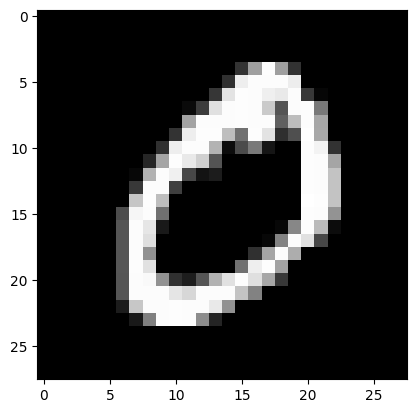

In [6]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [7]:
#Normalizando os dados em uma escala de 0 e 1
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0


In [19]:
# Reshape para os dados em uma dimensão
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:])) #Reshape para remodelar no formato de uma unica dimensão
#o primeiro parametro é o numero de dimensões(len(X_train)),

#E a segunda dimensão que é alterada, retorna o produto da tupla pega do
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [23]:
X_train_noisy= X_train + 0.5* np.random.normal(loc=0.0, scale = 1.0, size = X_train.shape) #Distribuição normal

In [24]:
X_test_noisy= X_test + 0.5* np.random.normal(loc=0.0, scale = 1.0, size = X_test.shape) #Distribuição normal

In [28]:
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

# limitar os valores de um array dentro de um intervalo especificado.
#Ela "corta" (clip) os valores que estão fora dos limites definidos,
# substituindo-os pelos limites mínimo ou máximo.



In [29]:
inputs = Input(shape=(784,))
#Encoder
encoder = Dense(32, activation = 'relu')(inputs)
#Decoder
decoder = Dense(784, activation ='sigmoid')(encoder)

autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy')
autoencoder.fit(X_train_noisy,X_train, epochs = 100, batch_size=256, shuffle=True,
                validation_data= (X_test_noisy,X_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3647 - val_loss: 0.2266
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2129 - val_loss: 0.1832
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1791 - val_loss: 0.1642
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1618 - val_loss: 0.1509
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1497 - val_loss: 0.1425
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1425 - val_loss: 0.1379
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1382 - val_loss: 0.1347
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1350 - val_loss: 0.1324
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1330 - val_loss: 0.1306
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1310 - val_loss: 0.1295
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1304 - val_loss: 0.1280
Epoch 12/100
235/235 ━━━━━━━━━

In [32]:
idx = np.random.randint(X_test.shape[0])
original_image = X_test[idx]

In [34]:
noyse_image = original_image + 0.5* np.random.normal(loc=0.0, scale = 1.0, size = original_image.shape) #Distribuição normal
noyse_image = np.clip(noyse_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noyse_image, axis=0))

denoised_image = denoised_image.reshape(28,28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

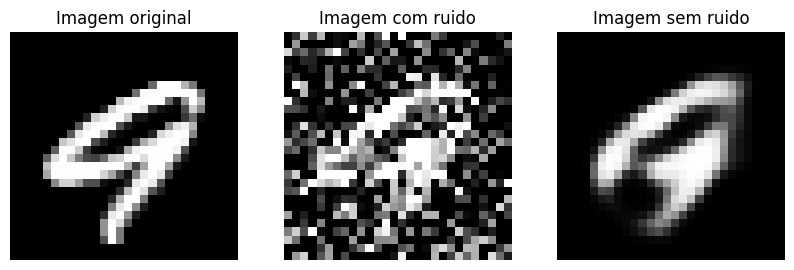

In [37]:
plt.figure(figsize = (10,4))

plt.subplot(1,3,1)
plt.imshow(original_image.reshape(28,28), cmap='gray')
plt.title('Imagem original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noyse_image.reshape(28,28), cmap='gray')
plt.title('Imagem com ruido')
plt.axis('off')

plt.subplot(1,3,3)

plt.imshow(denoised_image.reshape(28,28),cmap='gray')
plt.title('Imagem sem ruido')
plt.axis('off')




#Faremos um teste com o Sklearn pipeline